In [1]:
# import pandas, numpy and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define a function that converts pgamma in the sqrt(s)
def computeSqrts(p_gamma):
    """
        Given the magnitude of the photon momentum this function
        computes the respetive sqrt(s).
        The photon four momentum is (p_gamma, 0, 0, p_gamma)
        The proton four momentum is (mp,0,0,0) because it is at rest
        Then s = (p_gamma + mp)^2 - p_gamma^2
    """
    # mass of the proton is 0.938 GeV
    return np.round(np.sqrt((0.938+p_gamma)**2 - p_gamma**2),4)

In [3]:
# Load data_set1.csv
data_set1 = pd.read_csv("HEPData-ins129172-v1-csv/Table1.csv", skiprows = 10)
data_set2 = pd.read_csv("data.txt", sep = '\t')
# Wcentral, Wminus, Wplus, sigma, stat err, sys err
zeus_data = [209, 195, 225, 174, 1, 13]
zeus_error = np.sqrt(1**2+13**2)
# Wcentral, Wminus, Wplus, sigma, err
h1_data = [200, 165, 252, 165.3, 11.2]

In [4]:
# data_set1 computations
# Compute sqrt(s) values of dataset1
p_gammas = np.array(data_set1["E [GEV]"])
sqrt_s_vals = computeSqrts(p_gammas)
# Get sigma values
sigma_vals = np.array(data_set1["SIG [MUB]"])
stat_error_vals = np.array(data_set1["error +"])
sys_error_vals = 0.007 * sigma_vals
error_vals = np.sqrt(stat_error_vals**2 + sys_error_vals**2)

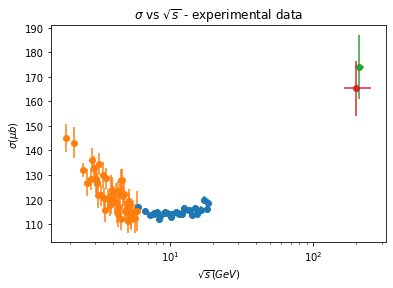

In [5]:
plt.errorbar(sqrt_s_vals, sigma_vals, error_vals, fmt='o')
plt.errorbar(data_set2["sqrt(s)(GeV)"], data_set2["sigma(mub)"], data_set2["error(mub)"], fmt = "o")
plt.errorbar(zeus_data[0], zeus_data[3], xerr = [[zeus_data[0]-zeus_data[1]], [zeus_data[2]-zeus_data[0]]],
                         yerr=zeus_error, fmt = "o")
plt.errorbar(h1_data[0], h1_data[3], xerr = [[h1_data[0]-h1_data[1]], [h1_data[2]-h1_data[0]]], 
             yerr= h1_data[4], fmt = "o")
plt.ylabel(r'$\sigma(\mu b)$')
plt.xlabel(r'$\sqrt{s}(GeV)$')
plt.xscale("log")
plt.title(r'$\sigma$'+" vs " + r'$\sqrt{s}$' + " - experimental data")
plt.show()

In [6]:
# Merge all the previous data in a data frame with columns
# W_central W_Plus W_Minus Sigma Errorp Error
# Construction of data set1 DF
length_data_set1 = len(data_set1)
W_central_data_set1 = sqrt_s_vals
W_plus_data_set1 = np.zeros(length_data_set1)
W_minus_data_set1 = np.zeros(length_data_set1)
sigma_data_set1 = sigma_vals
errorp_data_set1 = error_vals
errorm_data_set1 = error_vals
data_set_1_df = pd.DataFrame(data = {"W(GeV)": W_central_data_set1, "WErrorp": W_plus_data_set1,
                                    "WErrorm": W_minus_data_set1, "sigma(mub)":sigma_data_set1,
                                    "Errorp": errorp_data_set1, "Errorm":errorm_data_set1})
# Construction of data set 2 df
length_data_set2 = len(data_set2)
W_central_data_set2 = data_set2["sqrt(s)(GeV)"]
W_plus_data_set2 = np.zeros(length_data_set2)
W_minus_data_set2 = np.zeros(length_data_set2)
sigma_data_set2 = np.array(data_set2["sigma(mub)"])
errorp_data_set2 = np.array(data_set2["error(mub)"])
errorm_data_set2 = np.array(data_set2["error(mub)"])
data_set_2_df = pd.DataFrame(data = {"W(GeV)": W_central_data_set2, "WErrorp": W_plus_data_set2,
                                    "WErrorm": W_minus_data_set2, "sigma(mub)":sigma_data_set2,
                                    "Errorp": errorp_data_set2, "Errorm":errorm_data_set2})

# Construction of ZEUS df
ZEUS_df = pd.DataFrame(data = {"W(GeV)": [zeus_data[0]], "WErrorp": [zeus_data[2]-zeus_data[0]],
                              "WErrorm": [zeus_data[0]- zeus_data[1]], "sigma(mub)": [zeus_data[3]],
                              "Errorp": [zeus_error], "Errorm":[zeus_error]})

# Construction of H1 df
H1_df = pd.DataFrame(data = {"W(GeV)": [h1_data[0]], "WErrorp": [h1_data[2]-h1_data[0]],
                              "WErrorm": [h1_data[0]- h1_data[1]], "sigma(mub)": [h1_data[3]],
                              "Errorp": [h1_data[4]], "Errorm":[h1_data[4]]})

# Now that the DF are uniform we concatenate them
full_data = pd.concat([data_set_1_df, data_set_2_df, ZEUS_df, H1_df], ignore_index = True)
full_data = full_data.sort_values(by=["W(GeV)"])
full_data_2 = pd.concat([data_set_1_df, ZEUS_df, H1_df], ignore_index = True)
full_data_2 = full_data_2.sort_values(by=["W(GeV)"])

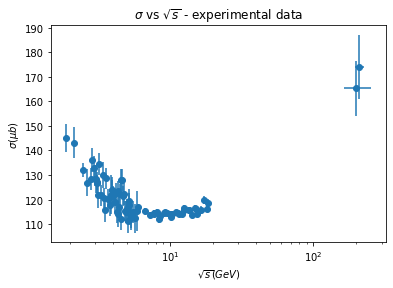

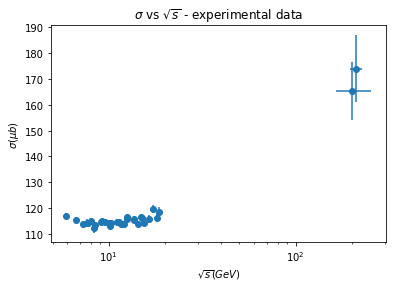

In [7]:
# We can plot the data to check quickly if we have done it correctly
plt.errorbar(full_data["W(GeV)"], full_data["sigma(mub)"], xerr = [full_data["WErrorm"],full_data["WErrorp"]], 
             yerr = [full_data["Errorm"],full_data["Errorp"]], fmt = "o")
plt.ylabel(r'$\sigma(\mu b)$')
plt.xlabel(r'$\sqrt{s}(GeV)$')
plt.xscale("log")
plt.title(r'$\sigma$'+" vs " + r'$\sqrt{s}$' + " - experimental data")
plt.show()

plt.errorbar(full_data_2["W(GeV)"], full_data_2["sigma(mub)"], xerr = [full_data_2["WErrorm"],full_data_2["WErrorp"]], 
             yerr = [full_data_2["Errorm"],full_data_2["Errorp"]], fmt = "o")
plt.ylabel(r'$\sigma(\mu b)$')
plt.xlabel(r'$\sqrt{s}(GeV)$')
plt.xscale("log")
plt.title(r'$\sigma$'+" vs " + r'$\sqrt{s}$' + " - experimental data")
plt.show()

In [8]:
full_data.to_csv("SigmaGammaProton.txt",sep = '\t', index = False)
full_data_2.to_csv("SigmaGammaProton_2.txt", sep = '\t', index = False)